## Model Training

### 1.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [57]:
# Basic Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv(r'..\notebook\data\student.csv')

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [13]:
X = df.drop(columns=['math_score'], axis=1)

In [14]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y = df['math_score']

In [16]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

#### Transforming Column with 3 types of transformers

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [22]:
X = preprocessor.fit_transform(X)

In [23]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [24]:
X.shape

(1000, 19)

In [27]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [39]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)

    return mae, mse, rmse, r2

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    'CatBopst Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Train Model
    model.fit(X_train, y_train)

    # Model Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 =  evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance For Traing Set')
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('------------------------------------------------')

    print('Model Performance For Test Set')
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    
    mae_list.append(model_test_mae)
    mse_list.append(model_test_mse)
    rmse_list.append(model_test_rmse)
    r2_list.append(model_test_r2)

    # print('=' * 35)
    print('\n')

In [50]:
pd.DataFrame(list(zip(model_list, mae_list, mse_list, rmse_list, r2_list)), columns=['Model Name', 'MAE', 'MSE', 'RMSE', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,MAE,MSE,RMSE,R2_Score
2,Ridge,4.211101,29.056272,5.390387,0.880593
0,Linear Regression,4.218389,29.169640,5.400892,0.880127
5,Random Forest Regressor,4.609888,35.542110,5.961720,0.853940
8,AdaBoost Regressor,4.686873,36.025693,6.002141,0.851952
7,CatBopst Regressor,4.612532,36.103658,6.008632,0.851632
6,XGB Regressor,5.057731,41.903708,6.473307,0.827797
1,Lasso,5.157882,42.506417,6.519695,0.825320
3,K-Neighbors Regressor,5.637000,52.683400,7.258333,0.783497
4,Decision Tree,6.355000,62.225000,7.888282,0.744286


### Linear Regression

In [51]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) *100
print('Accuracy Of The Model Is %.2f' %score)

Accuracy Of The Model Is 88.01


### Plot y_pred and y_test

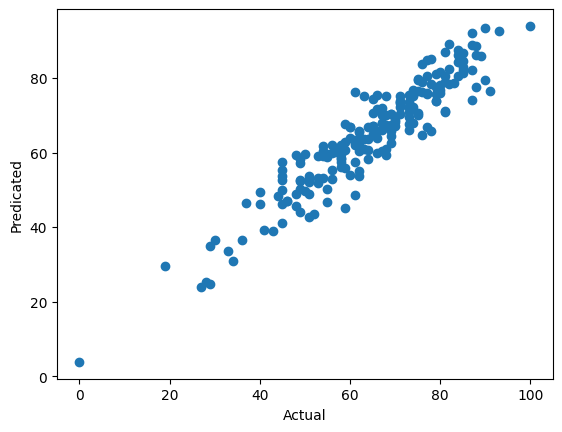

In [53]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicated');

<Axes: xlabel='math_score'>

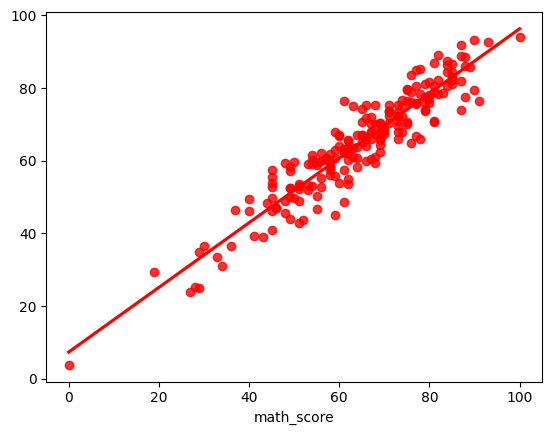

In [54]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

### Difference Between Actual And Predicted Values

In [56]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
